Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Read File 

In [3]:
df = pd.read_csv(r"D:\intern's tasks\Prodigy DS\task1\adult.csv")

Exploring Data

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


check for Nulls

In [15]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

check for duplicates

In [16]:
df.duplicated().sum()

52

In [17]:
df.drop_duplicates(inplace=True)

In [8]:
num_cols = df.select_dtypes("number")
num_cols.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [9]:
num_cols.columns.size

6

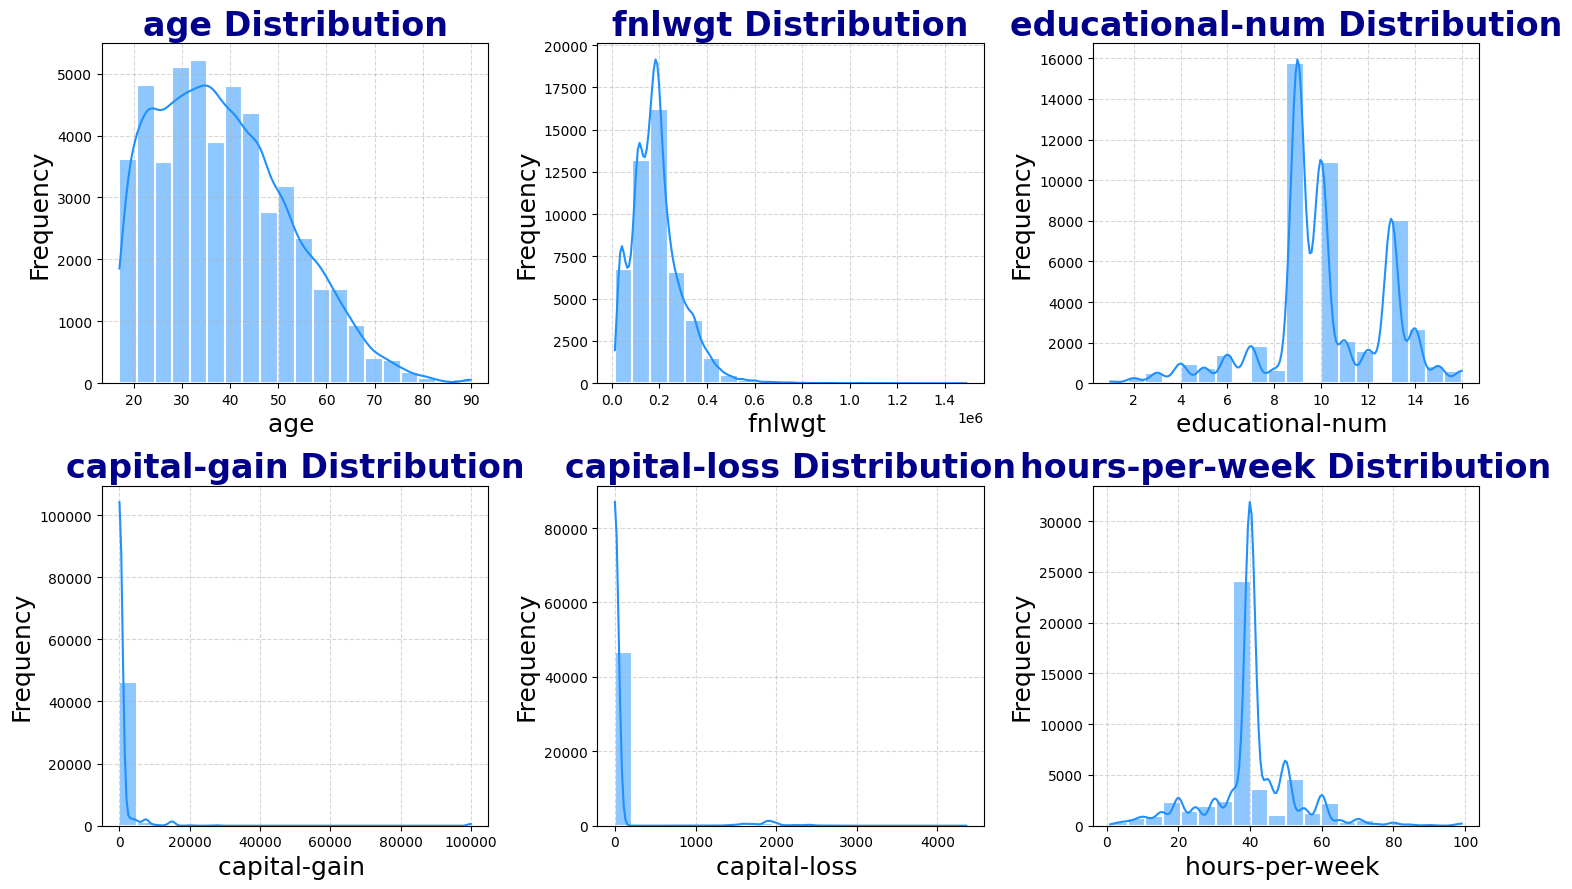

In [10]:
plt.figure(figsize=(15,9))

for i,col in enumerate(num_cols.columns) :
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], bins=20, kde=True, color='dodgerblue', edgecolor='white', linewidth=1.5)
    plt.title(f"{col} Distribution",fontsize=24, fontweight='bold', color='darkblue')
    plt.xlabel(f"{col} ",fontsize=18)
    plt.ylabel("Frequency",fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.show()

In [11]:
obj_col = df.select_dtypes("object")
obj_col.columns.size

9

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22840\2573987312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22840\2573987312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22840\2573987312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22840\2573987312.py:5: FutureWarning: 

Passing `palette` withou

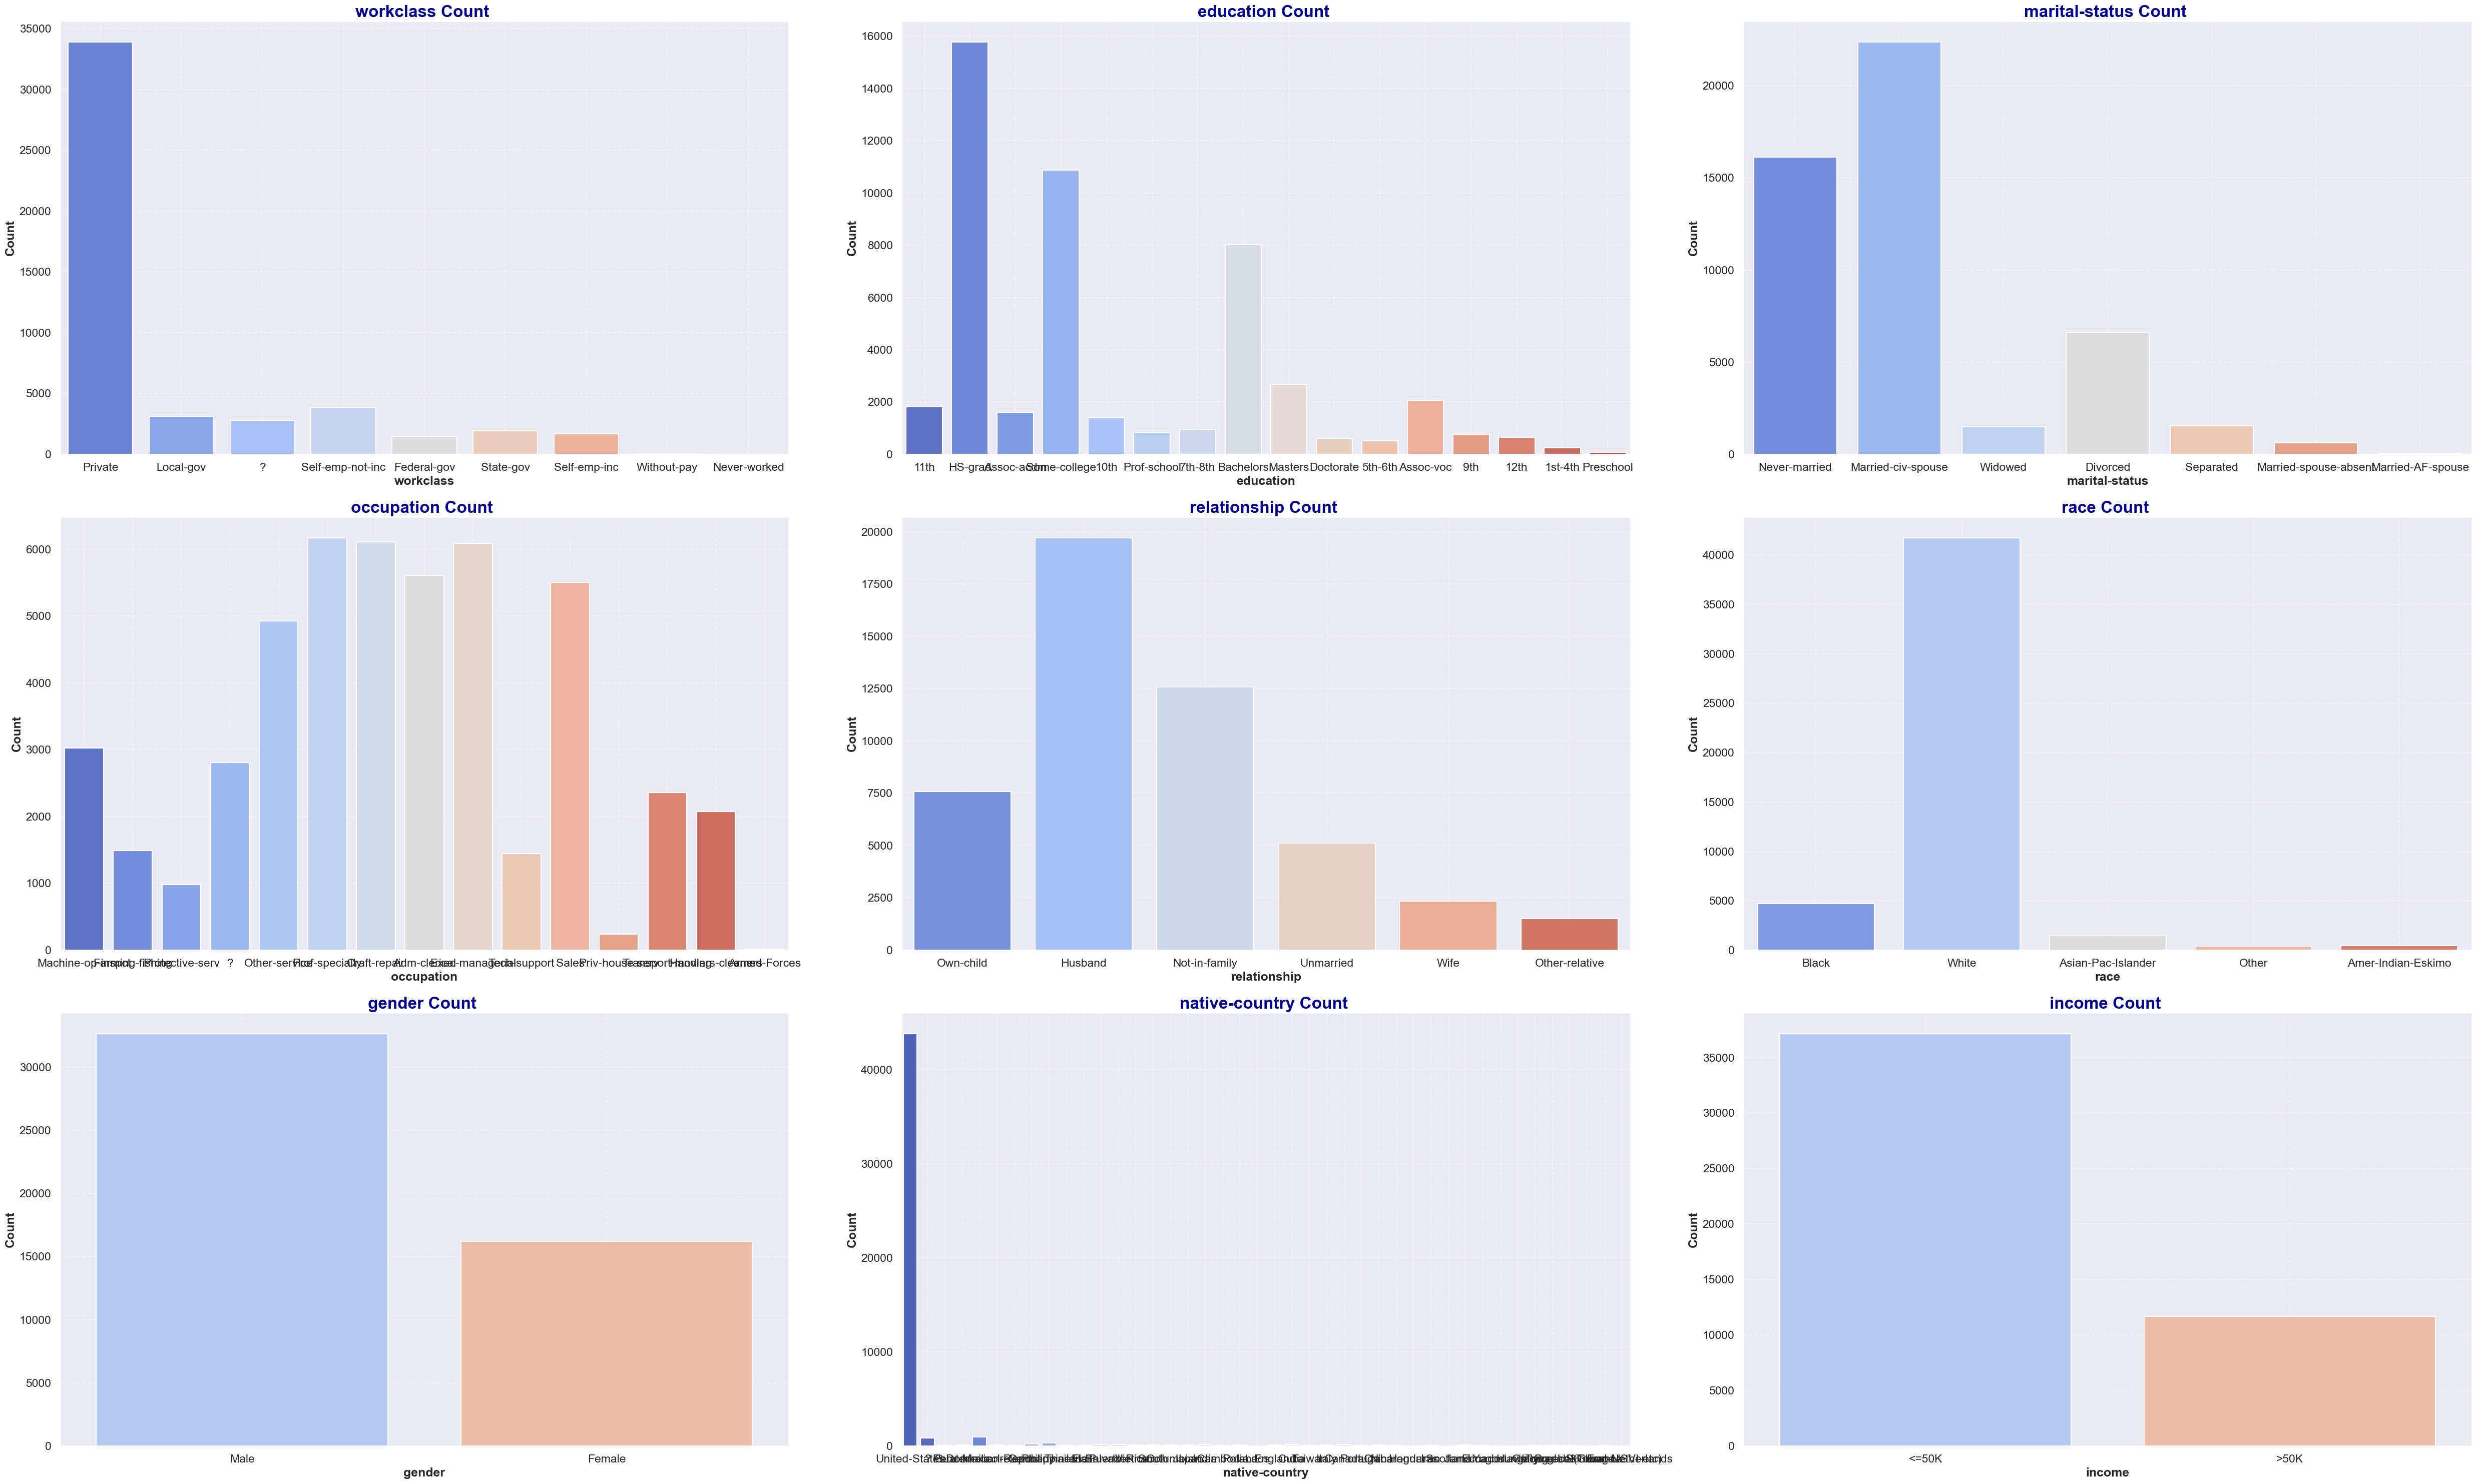

In [12]:
plt.figure(figsize=(50,30))
sns.set_theme("talk")
for i, col in enumerate(obj_col.columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[col],palette='coolwarm')
    plt.title(f"{col} Count ",fontsize=24, fontweight='bold', color='darkblue')
    plt.xlabel(f"{col}",fontsize=18,fontweight='bold')
    plt.ylabel(f"Count" , fontsize=18,fontweight='bold')
    plt.grid(True,linestyle='--',alpha=.4)
plt.tight_layout()
plt.show()

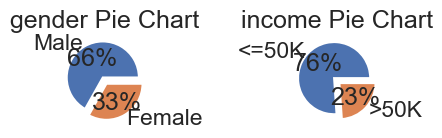

In [13]:
pie_col = ['gender','income']

for i, col in enumerate(pie_col):
    plt.subplot(3,3,i+1)
    uni = df[col].value_counts()
    cont = uni.unique()
    cate = uni.index
    plt.pie(cont,labels=cate,autopct='%1.1d%%',explode=[0.1,0.1])
    plt.title(f'{col} Pie Chart')
plt.subplots_adjust(wspace=2)
plt.tight_layout()    
    
    